https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import load

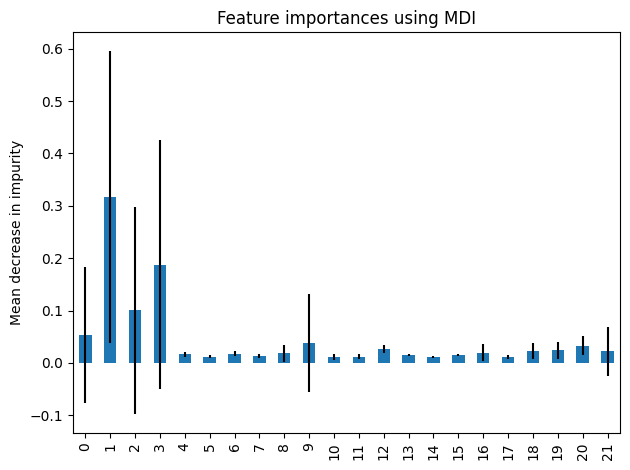

In [3]:
random_forest = load('../models/random_forest.joblib')

importances = random_forest.feature_importances_
forest_importances = pd.Series(importances, index=range(22))
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

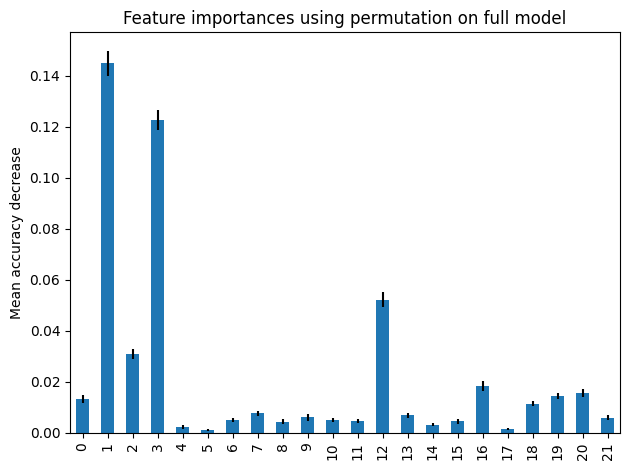

In [4]:
from sklearn.inspection import permutation_importance

X_test = np.load('../data/X_test_all_indices.npy')
y_test = np.load('../data/y_test.npy')

result = permutation_importance(random_forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
forest_importances = pd.Series(result.importances_mean, index=range(22))

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Both methods agree that the **B3** band (Green) is - not surprisingly - most important. Also **B5** (Visible and Near Infrared with a central wavelength of 705 nm) and **B4** (Red) are important. Further, permutation-based importance is high for the *Green Normalized Difference Vegetation Index (GNDVI)*, *Red edge Ratio Index 1 (RRI1)*, *Normalized Burn Ratio (NBR)*, *Normalized Difference Infrared Index (NDII)* and *Moisture Stress Index (MSI)*.

Those eight features were used to form a third training dataset `X_train_selected_indices` (apart from `X_train` and `X_train_all_indices`).

https://gisgeography.com/sentinel-2-bands-combinations/

Index | Band | Description
--- | --- | ---
0 | B2 | Blue
1 | B3 | Green
2 | B4 | Red
3 | B5 | Visible and Near Infrared (VNIR)
4 | B6 | VNIR
5 | B7 | VNIR
6 | B8 | VNIR
7 | B8A | VNIR
8 | B11 | Short Wave Infrared (SWIR)
9 | B12 | SWIR
10 | B08/B04 | Simple Ratio (SR)
11 | (B08 − B04)/(B08 + B04) | Normalized Difference Vegetation Index (NDVI)
12 | (B08 − B03)/(B08 + B03) | Green Normalized Difference Vegetation Index (GNDVI)
13 | (B03 − B04)/(B03 + B04) | Vegetation Index green (VIgreen)
14 | (B07 − B04)/(B07 + B04) | Red Edge Normalized Difference Vegetation Index (RENDVI)
15 | B05/B04 | Red Edge Simple Ratio (SRRE)
16 | B8A/B05 | Red edge Ratio Index 1 (RRI1)
17 | (B07−B04)/(B05/B06) | Inverted Red Edge Chlorophyll Index (IRECI)
18 | B11/B8A | Moisture Stress Index (MSI)
19 | (B8A − B11)/(B8A + B11) | Normalized Difference Infrared Index (NDII)
20 | (B8A − B12)/(B8A + B12) | Normalized Burn Ratio (NBR)
21 | B8A/(B05 + B12) | Specific Leaf Area Vegetation Index (SLAVI)